In [1]:
# !pip3 install keyboard
# !pip3 install mplfinance
# !pip3 install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

# jupyter labextension install @jupyter-widgets/jupyterlab-manager (FOR JUPYTER LAB)

# !pip3 install bqplot

# $ git clone https://github.com/bloomberg/bqplot.git
# $ cd bqplot
# $ pip install -e .
# $ jupyter nbextension install --py --symlink --sys-prefix bqplot
# $ jupyter nbextension enable --py --sys-prefix bqplot

how fast slider (0.2-6hr/s)
initial_dollar
initial bitcoin
start time
trade size 
commission
slippage = (rand 0-2)

In [2]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
# defining some widgets
text = widgets.Text(
       value='My Text',
       description='Title', )
calendar = widgets.DatePicker(
           description='Select Date')
slider = widgets.FloatSlider(value=1, min=0.2, max=6.1,
                             description = 'Speed(h/s)',step=0.1,)
menu = widgets.Dropdown(
       options=['Bitcoin', 'Ethereum', 'Litecoin'],
       value='Bitcoin',
       description='Crypto Coin:')
checkbox = widgets.Checkbox(
           description='Check to invert',)



a = widgets.FloatText(4)


display(a)
print(a.value)

FloatText(value=4.0)

4.0


In [3]:
# current value of text, checkbox and calendar 
print('Widget text has value {}, of {}'.format(text.value, type(text.value)))
print('Widget checkbox has value {}, of {}'.format(checkbox.value, type(checkbox.value)))
print('Widget calendar has value {}, of {}'.format(calendar.value, type(calendar.value)))

Widget text has value My Text, of <class 'str'>
Widget checkbox has value False, of <class 'bool'>
Widget calendar has value None, of <class 'NoneType'>


In [4]:
from IPython.display import Markdown
# Using output to display Markdown
markdown_out = widgets.Output()
with markdown_out:
    display(Markdown('Slider value is ${}$'.format(slider.value)))
markdown_out

Output()

In [5]:
import pandas as pd
import numpy as np
# from matplotlib import pyplot as plt
import mplfinance as mpf
# %matplotlib inline  
from datetime import datetime
import time
from IPython.display import clear_output
# from ipywidgets import slider
df = pd.read_csv('BTC-USD_60_1583798400_720d_N60.csv')


ohlcv = df.loc[:, ['time', 'open', 'high', 'low', 'close', 'volume']]


ohlcv.set_index('time', inplace=True)
ohlcv.index = pd.to_datetime(ohlcv.index, unit = 's')

ohlcv.columns = ohlcv.columns.map(lambda x: x.capitalize())

In [65]:
commission = .35/100

trade_history = dict()
net_worths = list()



balance_btc = 0
balance_usd = 3000
currstep = 0
trade_amount = 0.1

commission_widg =  widgets.FloatSlider(value=0.35, min=0.05, max=0.50,
                             description = 'Comm.(/100)',step=0.001,)
usd_balance_widg =  widgets.FloatSlider(value=3000, min=100, max=50000,
                                        description = 'USD_Balance',step=50)







commission = float(commission_widg.value / 100)
test = widgets.Label(value= str(commission))



balance_usd = usd_balance_widg.value

trade_history = dict()
net_worths = list()

balance_btc = 0
balance_usd = 3000
currstep = 0
trade_amount = 0.1



print(commission)

from ipywidgets import AppLayout
AppLayout(

#             footer=widgets.VBox([buy_button,sell_button,out]),
           footer=widgets.VBox([menu,commission_widg,test,usd_balance_widg])

,
 #           footer=out,
           pane_widths=['80px', 1, 1],
           pane_heights=['80px', 4, 1],
           height='60px',
           grid_gap="30px")





def price():
    global currstep
    return ohlcv['Open'][currstep]
    
    
def net_worth():
    global balance_usd, balance_btc, currstep
    return balance_usd + (balance_btc * price() * (1 - commission))

def buy():
    global balance_btc, balance_usd, currstep, trade_amount
    btc_value = trade_amount * price()
    btc_cost = btc_value * (1 + commission)
    if balance_usd >= btc_cost:
        balance_usd -= btc_cost
        balance_btc += trade_amount
        trade_history.update({currstep : 'buy'})
        return True
        
def sell():
    global balance_btc, balance_usd, currstep, trade_amount
    btc_value = trade_amount * price()
    if balance_btc >= trade_amount:
        balance_usd += btc_value * (1 - commission) 
        balance_btc -= trade_amount
        trade_history.update({currstep: "sell"})
        return True
    

buy_button = widgets.Button(description='Buy')
sell_button = widgets.Button(description='Sell')
out = widgets.Output()
def on_button_clicked(a):
      # "linking function with output"
    with out:
        action = a.description.lower()
        if action == 'buy':
            clear_output()
            if buy():
                print('Bought at: {}'.format(price()))
            else:
                print('Not enough funds')
        else:
            clear_output()
            if sell():
                print('Sold at {}'.format(price()))
            else:
                print('Not enough funds')
        print('Net Worth: {}'.format(net_worth()))
              
              


buy_button.on_click(on_button_clicked)
sell_button.on_click(on_button_clicked)


0.0034999999999999996


In [66]:
test = widgets.Label(value= str(commission))


commission = float(commission_widg.value / 100)

balance_usd = usd_balance_widg.value

trade_history = dict()
net_worths = list()

balance_btc = 0
balance_usd = 3000
currstep = 0
trade_amount = 0.1



print(commission)

from ipywidgets import AppLayout
AppLayout(

#             footer=widgets.VBox([buy_button,sell_button,out]),
           footer=widgets.VBox([menu,commission_widg,test,usd_balance_widg])

,
 #           footer=out,
           pane_widths=['80px', 1, 1],
           pane_heights=['80px', 4, 1],
           height='60px',
           grid_gap="30px")




0.0034999999999999996


AppLayout(children=(VBox(children=(Dropdown(description='Crypto Coin:', options=('Bitcoin', 'Ethereum', 'Litec…

In [70]:

currstep = 3000


import bqplot as bq
import bqplot.pyplot as plt


ohlcv['OHLC'] =  ohlcv[['Open', 'High', 'Low', 'Close']].values.tolist()


fig = plt.figure()
dates = pd.to_datetime(ohlcv.index.map(lambda x: str(x)))

# print(dates)
# print(ohlcv['OHLC'].to_list())


# axes_options = {'x': {'label': 'X'}, 'y': {'label': 'Y'}}
ohlc1 = plt.ohlc(dates[currstep-100:currstep], ohlcv['OHLC'].to_list()[currstep-100:currstep], marker='candle', 
                 format='ohlc', stroke='black',stroke_width=1.5, colors=['#3f9', '#f93'])
#                  axes_options=axes_options)



import threading
from IPython.display import display
import ipywidgets as widgets
import time


stop_thread = False

sleep_dur = 1
step_size = 1

info_widg = widgets.HTML(value= 'Net_Worth: <br>BTC held: <br>USD held:')


def step():
    global currstep
    for i in range(len(ohlcv['OHLC'])-100):
        if currstep+100 > 1+len(ohlcv) or stop_thread:
            break
        time.sleep(sleep_dur)
        currstep+=step_size
        net_worths.append(net_worth())
        ohlc1.x = dates[currstep-100:currstep]
        ohlc1.y = ohlcv['OHLC'].to_list()[currstep-100:currstep]
        info_widg.value = 'Net_Worth: ' + str(round(net_worth(), 2)) +  '<br>BTC held: ' + str(round(balance_btc, 2)) +   '<br>USD held: ' + str(round(balance_usd, 2)) 


thread = threading.Thread(target=step)
        

stop_button = widgets.Button(description='Stop')
reset_button = widgets.Button(description='Start')
def stop_button_clicked(a):
    global stop_thread
    stop_thread = True
            

def reset_button_clicked(a):
    global stop_thread, thread
    global net_worths ,currstep, balance_btc, balance_usd 

    action = a.description.lower()
    if action == 'reset':
            stop_thread = True
            net_worths = []
            balance_btc = 0
            balance_usd = 3000
            currstep = 3000
            info_widg.value = 'Net_Worth: 3000.00<br>BTC held: 0<br>USD held: 3000.00'
            reset_button.description = "Start"
    if action == 'start':
            stop_thread = False
            thread = threading.Thread(target=step)
            thread.start()
            reset_button.description = "Reset"

            
stop_button.on_click(stop_button_clicked)
reset_button.on_click(reset_button_clicked)
        


# TODO: 
# shift-enter-ing causes multiple of these to run at the same time

fig.background_style = {'fill': '#888'}


from ipyleaflet import Map, basemaps, basemap_to_tiles, Heatmap, TileLayer
from ipywidgets import AppLayout, HTML, Layout, Dropdown, Output, Textarea, VBox, Label
import bqplot as bq
import numpy as np
from pandas import date_range

from ipywidgets import Button, Layout, VBox, Label


AppLayout(

            footer=widgets.HBox([widgets.VBox([buy_button,sell_button]),widgets.VBox([info_widg]), widgets.VBox([stop_button,reset_button]), out]),
           right_sidebar=fig,
 #           footer=out,
           pane_widths=['80px', 1, 1],
           pane_heights=['80px', 4, 1],
           height='600px',
           grid_gap="30px")



AppLayout(children=(HBox(children=(VBox(children=(Button(description='Buy', style=ButtonStyle()), Button(descr…

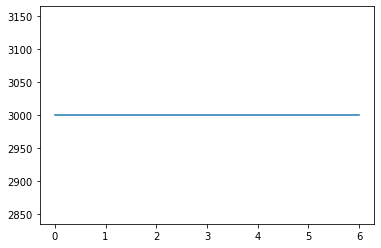

In [73]:
import matplotlib.pyplot as plt

plt.plot(list(range(0,len(net_worths))),net_worths)



In [ ]:
a = input()
print(a)
